In [1]:
#Imported some important libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline

### Data Cleaning 

URL to dataset : (https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh)

In [2]:
# To be able to view all of the dataframe's columns

file = '2015_Street_Tree_Census_-_Tree_Data.csv'
df = pd.read_csv(file)

df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [14]:
# It just checking cells if is there any null points

df.isnull().sum()

tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state                   0
latitude                0
longitude   

In [4]:
#It drops the null cells

df.dropna(inplace = True)


In [5]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [6]:
#New data set created which is usefull for my working area

trees = pd.concat([ df.tree_id,
                    df.created_at,
                    df.tree_dbh, 
                    df.status,
                    df.health, 
                    df.spc_common,
                    df.user_type, 
                    df.problems,
                    df.zip_city,
                    df.borocode,
                    df.borough,
                    df.guards],
                    axis=1)

trees.columns=[ 'id',                   #Integer, Unique identification number for each tree point
                'date',                 # Created date
                'diameter',             #Diameter of the tree, measured at approximately 54" / 137cm above the ground.
                'status',               #Indicates whether the tree is alive, standing dead, or a stump
                'health',               #Indicates the user’s perception of tree health
                'species',              #Common name for species, e.g. “red maple”
                'user',                 #This field describes the category of user who collected this tree point’s data
                'problems',             # A list of all problems observed with this tree.
                'city',                 #City as derived from zipcode
                'boro',                 #Code for borough in which tree point is located
                'borough',
                'guards'                #Indicates whether a guard is present, and if the user felt it was a helpful or harmful guard
                ]
trees['status'] = trees['status'].astype('category')
trees['user'] = trees['user'].astype('category')
trees['species'] = trees['species'].astype('category')
trees['boro'] = trees['boro'].astype('category')
trees['borough'] = trees['borough'].astype('category')
trees['health'] = trees['health'].astype('category')
trees['guards'] = trees['guards'].astype('category')

In [7]:
trees.head()

,id,date,diameter,status,health,species,user,problems,city,boro,borough,guards
0,180683,08/27/2015,3,Alive,Fair,red maple,TreesCount Staff,None,Forest Hills,4,Queens,None
1,200540,09/03/2015,21,Alive,Fair,pin oak,TreesCount Staff,Stones,Whitestone,4,Queens,None
2,204026,09/05/2015,3,Alive,Good,honeylocust,Volunteer,None,Brooklyn,3,Brooklyn,None
3,204337,09/05/2015,10,Alive,Good,honeylocust,Volunteer,Stones,Brooklyn,3,Brooklyn,None
4,189565,08/30/2015,21,Alive,Good,American linden,Volunteer,Stones,Brooklyn,3,Brooklyn,None


In [8]:
# arranged the font size and type of graphic titles

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']
rcParams['font.size'] = 12

### What are the most seen trees species?

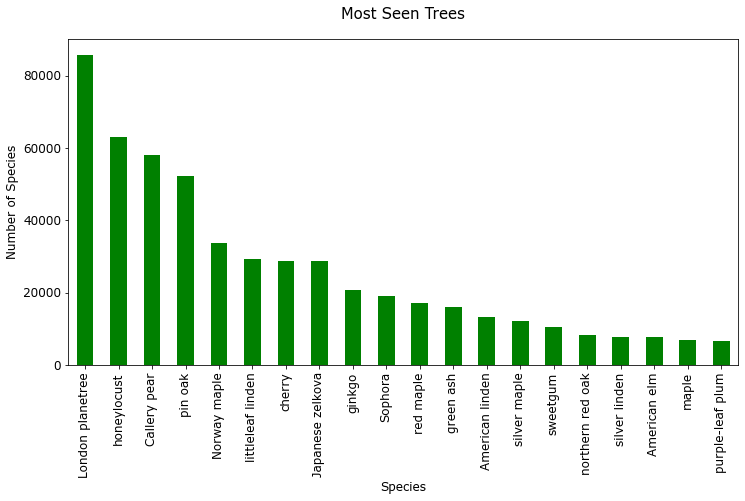

In [16]:
top20 = trees.species.value_counts()[0:20]
top20.keys()

fig = plt.figure(figsize = [12,6])


top20.plot(kind= 'bar', color= 'green')
plt.xlabel('Species')
plt.ylabel('Number of Species')

plt.title('Most Seen Trees', size= 15, loc='center', pad=20)


plt.savefig('Most Seen Trees.png')


### Is the trees are healthy ? 

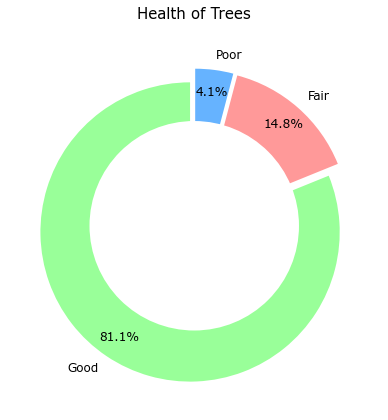

In [17]:
good = (trees['health'] == 'Good').sum()
fair = (trees['health'] == 'Fair').sum()
poor = (trees['health'] == 'Poor').sum()

proportions = [good, fair, poor]

labels = ['Good', 'Fair', 'Poor']

#colors
colors = ['#99ff99', '#ff9999','#66b3ff']

#explsion
explode = (0.05,0.05,0.05)

fig = plt.figure(figsize = [12,6])

plt.pie(proportions, 
         colors = colors, 
         labels=labels, 
         autopct='%1.1f%%', 
         startangle=90, 
         pctdistance=0.85, 
         explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Health of Trees", size = 15, pad = 20)

plt.tight_layout()

plt.savefig('Health of Trees.png')



### How many trees have helpful guards around them?

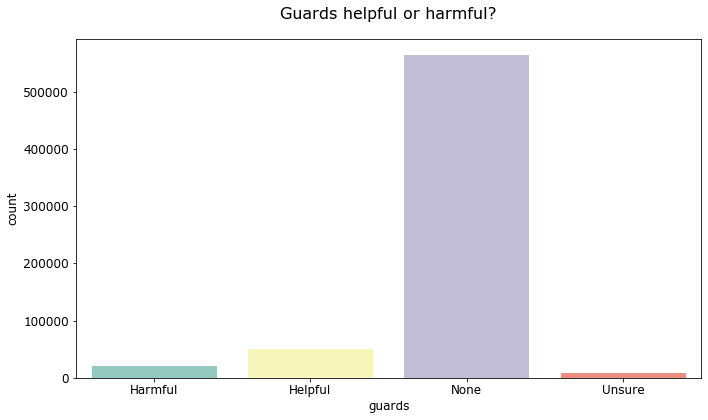

In [18]:
fig = plt.figure(figsize = [10,6])

guards = sns.countplot(x="guards", data=trees, palette="Set3")
plt.title('Guards helpful or harmful?', size=16, pad= 20)

plt.tight_layout()

plt.savefig('Guards helpful or harmful.png')

### Is there any relation between guards and trees health?

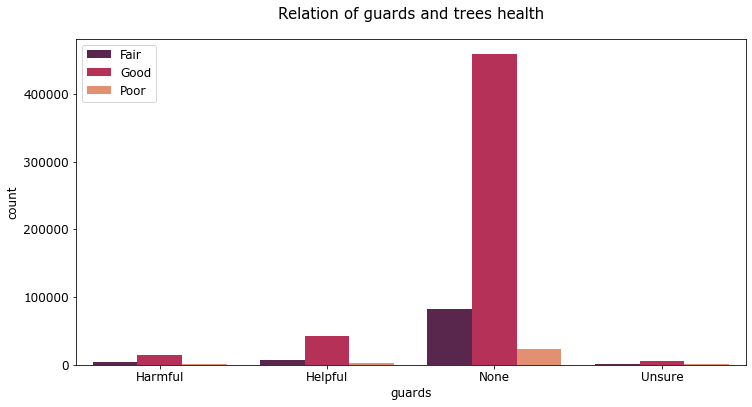

In [19]:
fig = plt.figure(figsize = [12,6])

relation = sns.countplot(x="guards", data=trees, palette= "rocket", hue='health')
plt.title('Relation of guards and trees health', size=15, pad= 20)
plt.legend(loc=2)
plt.savefig('Relation of guards and trees health.png')

### What is the user distribution ?

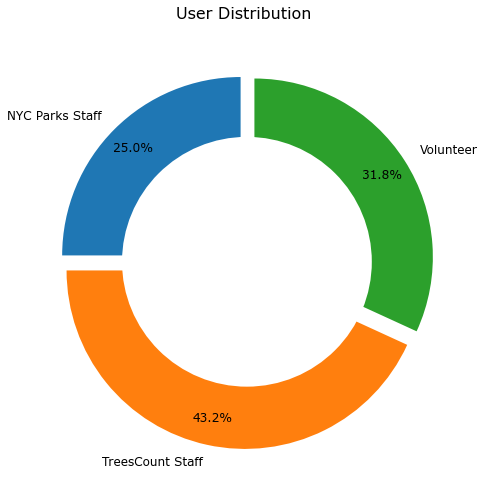

In [20]:
NYC = (trees['user'] == 'NYC Parks Staff').sum()
TreesCount = (trees['user'] == 'TreesCount Staff').sum()
Volunteer = (trees['user'] == 'Volunteer').sum()

proportions = [NYC, TreesCount, Volunteer]

labels = ['NYC Parks Staff', 'TreesCount Staff', 'Volunteer']


#explsion
explode = (0.05,0.05,0.05)

fig = plt.figure(figsize = [15,7])

plt.pie(proportions, 
         labels=labels, 
         autopct='%1.1f%%', 
         startangle=90, 
         pctdistance=0.85, 
         explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("User Distribution ", size = 16, pad = 20)

plt.tight_layout()

plt.savefig('User Distribution.png')


### Places of most collected datas

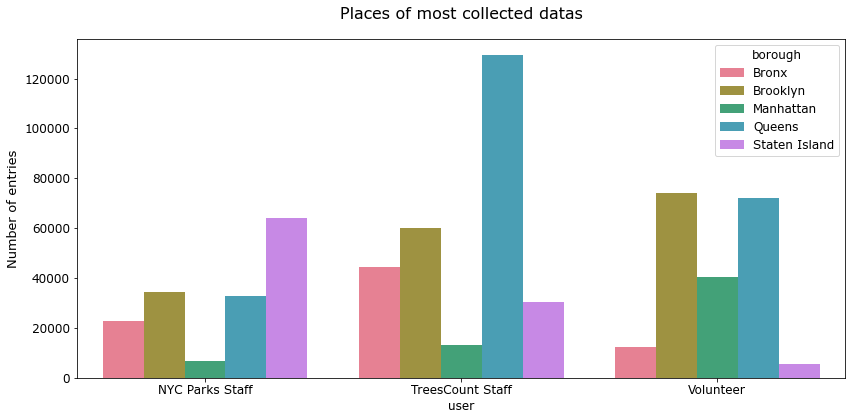

In [21]:
fig = plt.figure(figsize = [12,6])

users = sns.countplot(x="user", data=trees, palette="husl", hue= "borough")
plt.title('Places of most collected datas', size=16, pad= 20)
plt.ylabel('Number of entries', size=13)

plt.tight_layout()

plt.savefig('Places of most collected datas.png')



### What are the trees avarage diameters?

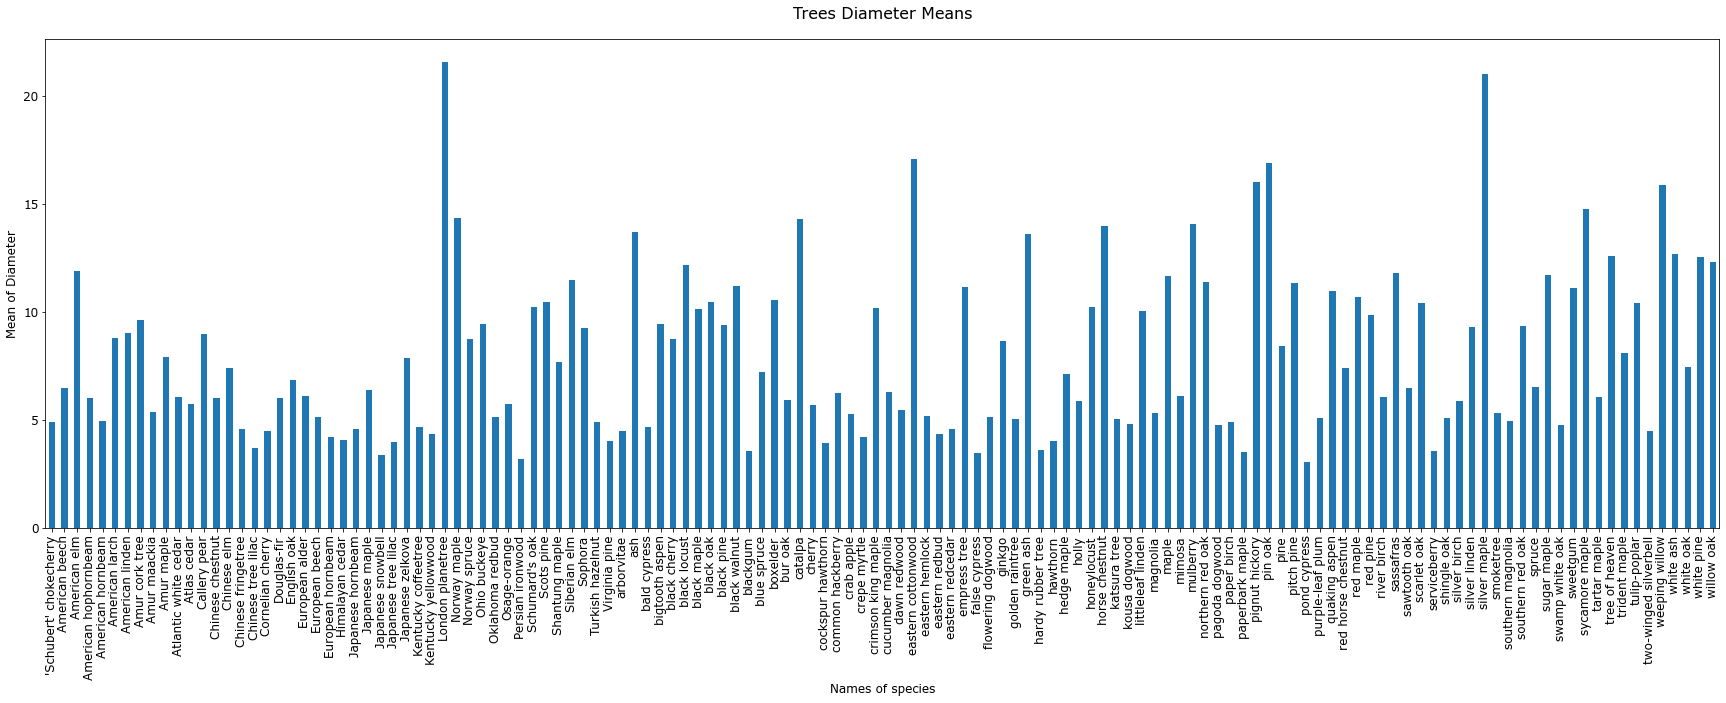

In [22]:
trees_diameter_mean = trees.groupby(["species"]).diameter.mean()
fig = plt.figure(figsize = [30,9])

trees_diameter_mean.plot(kind= 'bar', stacked=True)

plt.xlabel('Names of species')
plt.ylabel('Mean of Diameter')
plt.title('Trees Diameter Means', size= 16, pad= 20)

plt.savefig('Trees Diameter Means')
